## Teoría de Circuitos II
###  <span style="color:blue">Tarea semanal 5</span>
### Belén Torres

Los sistemas de antenas de transmisión de tipo Phased Array, son un tipo particular de antena que permiten controlar la dirección del haz emitido sin desplazamientos mecánicos. Se trata en esencia de múltiples antenas que reciben la misma señal de entrada, aunque afectada por desfasajes diferentes. Así, modificando los desfasajes y por efectos de interferencia constructiva o destructiva, se logra modificar el ángulo de apuntamiento sin requerir desplazamientos mecánicos.

Se desea diseñar desfasadores pasivos para un sistema de este tipo que opera en banda ancha, buscándose que no alteren la respuesta de módulo de la señal.

    a) Proponga una función transferencia normalizada de primer orden que permita rotar la fase, sin alterar el módulo. Dibuje 1) el diagrama de polos y ceros, 2) la respuesta de fase en función de la frecuencia y 3) calcule el retardo de grupo.

    b) Proponga una topología activa y una pasiva que implementen el diagrama de polos y ceros del punto anterior. Obtenga los valores de componentes pasivos (resistencias y capacitores) para lograr que la rotación de fase sea de 15º en ω=1 (medida respecto de la fase en ω=0).



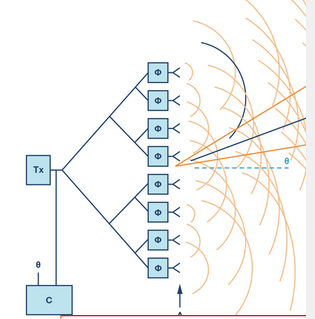

https://www.everythingrf.com/community/what-is-phased-array-antenna

$$T(s)=\frac{s-a}{s+a}$$

$$T(j\omega)=\frac{j\omega-a}{j\omega+a}$$

$$|T(j\omega)|= \frac{\sqrt{\omega^2+a^2}}{\sqrt{\omega^2+a^2}}=1 $$

$$\phi(j\omega)=\pi + arctg(-\frac{-\omega}{a})-arctg(-\frac{\omega}{a}) $$

Como el cero está en el *semiplano derecho* tenemos un aporte de $\pi$ en su fase

Como $arctg(x)=-arctg(-x)$ funcion impar

$$\phi(j\omega)=\pi -2 arctg(\frac{\omega}{a})$$

Retardo de grupo por definición:

$$\tau=-\frac{d\phi}{dt}=2 \cdot \frac{1}{1+(\frac{\omega}{a}^2) }\cdot  \frac{1}{a}$$

$$\tau=\frac{2}{a} \cdot \frac{1}{1+(\frac{\omega}{a}^2) }$$

Para buscar una cero en el semiplano derecho implementamos una red del tipo puente, y dado que tiene que ser de primer orden proponemos que posea un solo elemento reactivo

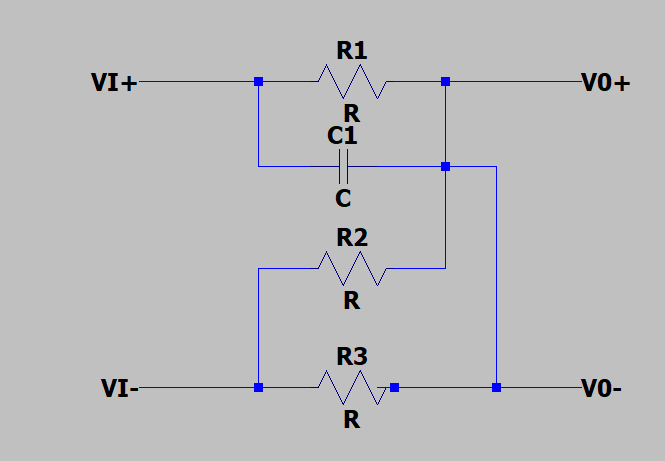


$$T(s)=\frac{R}{2R}-\frac{R}{R+\frac{1}{sC}} $$

$$T(s)=\frac{R^2+\frac{R}{sC}-2R^2}{2R^2+\frac{2R}{sC}} $$

$$T(s)=-\frac{sCR^2-R}{2sCR^2+2R} $$

$$T(s)=-\frac{1}{2}\frac{sCR-1}{sCR+1} $$

$$T(s)=-\frac{1}{2}\frac{s-\frac{1}{CR}}{s+\frac{1}{CR}} $$


Como el circuito ademas agrega 180º de fase tenemos que la fase es

$$\phi(j\omega)=2 arctg(\omega RC)$$

Nos pide que para $\omega=1\frac{rad}{seg}$ la fase sea de 15º menos 

Por lo tanto 

$\frac{15º}{2}=arctg(RC)$

si hacemos que C=1

$tg(7,5)=R$

R=0,13



### Circuito y simulación

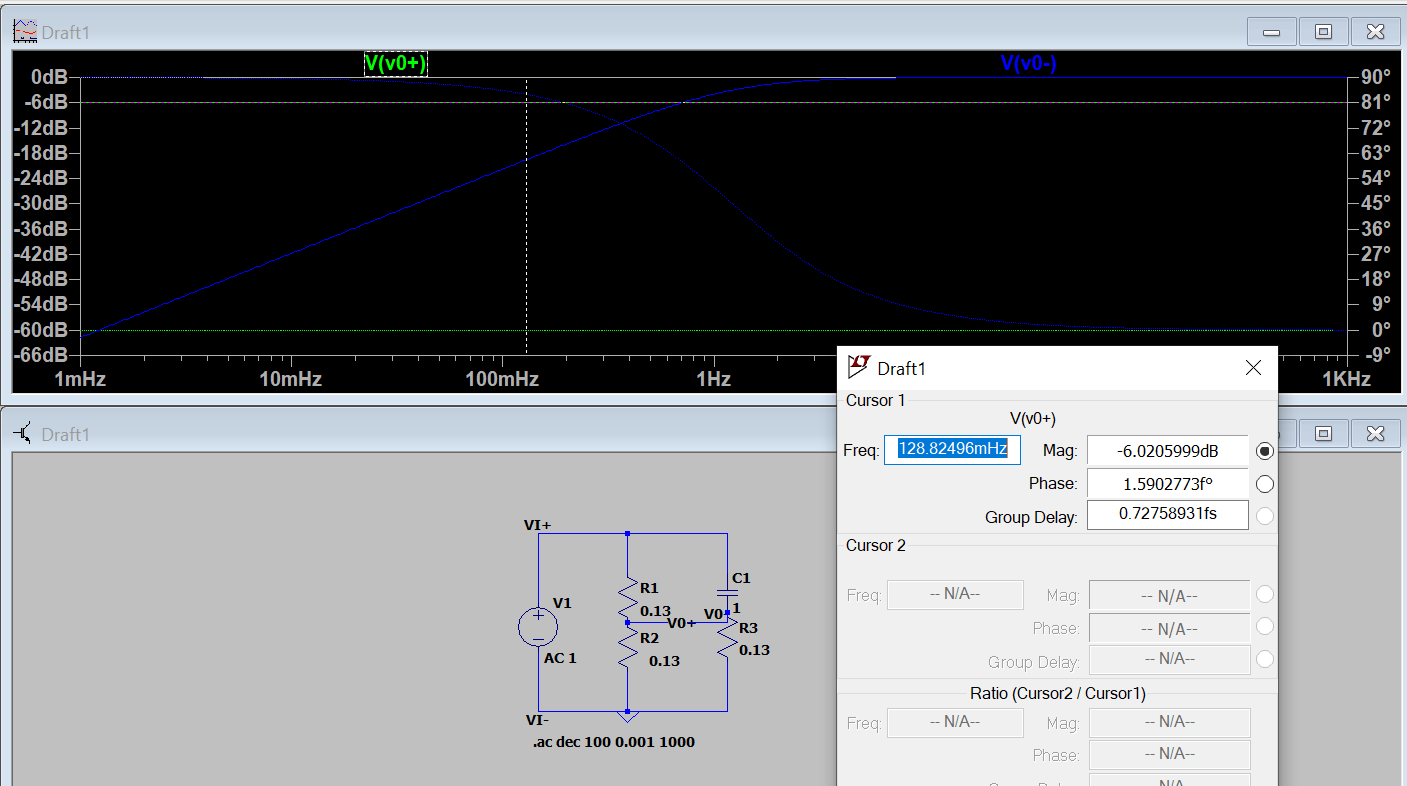